# Logistic Regression

## Numerical Optimization
The Logistic Regression model is obtained by **minimizing the average cross-entropy between the model predictions and the observed labels**. As we have seen, this corresponds also to a **Maximum Likelihood solution for the observed labels**, or to **minimizing the average Logistic Loss function.** See the next section for all the theory related to Logistic Regression, here we just report the final formulas for the three objective functions:
- log-likelihood: $l(\mathbf{w}, b) = \sum_{i=1}^{n} \left[c_i \log y_i + (1 - c_i) \log(1 - y_i)\right] \rightarrow$ GOAL: maximize $l(\mathbf{w}, b)$ wrt $\mathbf{w}, b$.

- average cross-entroy: $\mathcal{J}(\mathbf{w}, b) = -l(\mathbf{w}, b) = - \sum_{i=1}^{n} \left[c_i \log y_i + (1 - c_i) \log(1 - y_i)\right] \rightarrow$ GOAL: minimize $\mathcal{J}(\mathbf{w}, b)$ wrt $\mathbf{w}, b$.

- average Logistic Loss function: $\mathcal{J}(\mathbf{w}, b) = \sum_{i=1}^{n} \log(1 + e^{-z_i(\mathbf{w}^T \mathbf{x}_i + b)})  \rightarrow$ GOAL: minimize $\mathcal{J}(\mathbf{w}, b)$ wrt $\mathbf{w}, b$.

While for Gaussian models closed form expressions are available for the
ML solutions, this is not the case for Logistic Regression. This means, **we can't just solve system of equations to find the optimal parameters**. This is because the **sigmoid** function involved in binary Logistic regression (and the **softmax** function involved in multiclass Logistic regression) make the loss function nonlinear and non-convex in general<br>
Therefore, we turn to numerical optimization
to find the maximizer of the class likelihoods, or, equivalently, the minimizer of the average cross-entropy or average Logistic Loss function. <br>
Numerical optimization algorithms look for the minimum of a function $f(x)$ with respect to the argument
$x$. Here we briefly explain two methods, the second one will be the one adopted by us:
### 1) Gradient Descent (GD)
with this iterative method, at each iteration $t$ we compute $x_{t+1}$ from $x_{t}$:
- we compute the gradient $\nabla f(x_t)$ of the loss function with respect to the current parameters $x_t$.
- we then update the parameters by moving in the **opposite direction of the gradient** (this is done by multiplying the gradient by $-1$), scaled by a learning rate (also called step) $\alpha_t$:

$$
x_{t+1} = x_t - \alpha_t \nabla f(x_t)
$$

Under the assumptions that the step becomes lower when iterations pass $\left( \alpha_t \rightarrow 0 \right)$ and that the whole sum of all the steps at each iteration is unbounded $\left( \sum_{t=1}^{\infty} \alpha_t \rightarrow \infty \right)$, we are certain that the algorithm converges to a **local minimum** of $f$.
#### Pros of GD
- Easy to implement
- Low memory usage

#### Cons of GD
- Can be **very slow to converge**
- Sensitive to choice of learning rate
- Struggles with ill-conditioned loss surfaces

### 2) L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
L-BFGS is a more advanced optimization algorithm that uses an **approximate second-order method**. Instead of relying solely on the gradient, it also uses curvature information so second order information, such as the Hessian of the function, from previous iterations to guide the search more efficiently. <br>

#### Pros of L-BFGS
- Much **faster convergence** than gradient descent
- No need to compute or store the full Hessian (which would be $\mathcal{O}(d^2)$)

#### Cons of L-BFGS
- Slightly more complex and higher per-iteration cost ($\mathcal{O}(md)$, whereas GD has just $\mathcal{O}(d)$)


This second algorithm is the one we''l use and is implemented in `scipy` (requires importing `scipy.optimize`). We will use the `scipy.optimize.fmin_l_bfgs_b` interface to the numerical solver.

`scipy.optimize.fmin_l_bfgs_b` requires at least 2 arguments (check the documentation for more details):

* `func`: the function we want to minimize.
* `x0`: the starting value for the algorithm.

The L-BFGS algorithm requires computing the objective function and its gradient. To pass the gradient we have different options:

* Through `func`: `func` should return a tuple `(f(x), \nabla_x f(x))`.
* Through the optional parameter `fprime`: `fprime` is a function computing the gradient. In this case, `func` should only return the objective value $f(x)$.
* Let the implementation compute an approximated gradient: pass `approx_grad = True`. In this case, `func` should only return the objective value $f(x)$.

The last option does not require writing a function that computes the gradient, as an approximation of the gradient is automatically obtained through finite differences. While this has the advantage that we do not need to derive and implement the gradient, it has two drawbacks:

* The gradient computed through finite differences may not be accurate enough.
* The computations are much more expensive, since we need to evaluate the objective function a number of times at least $D$, where $D$ is the size of $x$, at each iteration, and if we want a more accurate approximation of the gradient we may need to evaluate $f$ many more times.



As an example, we now try to apply the L-BFGS to the function:
$$
f(y, z) = (y + 3)^2 + \sin(y) + (z + 1)^2
$$

In [1]:
import numpy as np
import scipy.optimize as opt

import LogisticRegression.LR as LR

/Users/nicolotermine/zMellow/GitHub-Poli/Polito/MLPR/Bible/LogisticRegression/LR.py:175: SyntaxWarning: invalid escape sequence '\l'
  colLabels=["$\lambda$", "$\mathcal{J}(\mathbf{w}^*, b^*)$", "Error rate", "minDCF ($\pi_T = 0.5$)", f"actDCF ($\pi_T = 0.5$)"],
/Users/nicolotermine/zMellow/GitHub-Poli/Polito/MLPR/Bible/LogisticRegression/LR.py:175: SyntaxWarning: invalid escape sequence '\m'
  colLabels=["$\lambda$", "$\mathcal{J}(\mathbf{w}^*, b^*)$", "Error rate", "minDCF ($\pi_T = 0.5$)", f"actDCF ($\pi_T = 0.5$)"],
/Users/nicolotermine/zMellow/GitHub-Poli/Polito/MLPR/Bible/LogisticRegression/LR.py:175: SyntaxWarning: invalid escape sequence '\p'
  colLabels=["$\lambda$", "$\mathcal{J}(\mathbf{w}^*, b^*)$", "Error rate", "minDCF ($\pi_T = 0.5$)", f"actDCF ($\pi_T = 0.5$)"],
/Users/nicolotermine/zMellow/GitHub-Poli/Polito/MLPR/Bible/LogisticRegression/LR.py:175: SyntaxWarning: invalid escape sequence '\p'
  colLabels=["$\lambda$", "$\mathcal{J}(\mathbf{w}^*, b^*)$", "Error rate", "m

In [2]:
#implementation of function f(y,z)
def f(x):
    #x is an numpy array of shape (2,)
    #x[0] is y and x[1] is z
    #te function returns the value of f(y,z) = (y+3)^2 + sin(y) + (z+1)^2
    y = x[0]
    z = x[1]

    return (y+3)**2 + np.sin(y) + (z+1)**2


#Now we call scipy.optimize.fmin_l_bfgs_b passing the function f and the initial x0 which is a numpy array of values [0,0] and approx_grad = True
x_0 = np.array([0, 0])

#x_min is the minimum point of the function f
#f_min is the value of the function f at the minimum point x_min
#d is a dictionary with information about the optimization process
x_min, f_min, d = opt.fmin_l_bfgs_b(f, x_0, approx_grad=True)

print(f"Mimimum of f(y,z) is at x_min = {x_min}")
print(f"f(y_min,z_min) = f(x_min) = {f_min}")
print(f"Optimization info: {d}")

Mimimum of f(y,z) is at x_min = [-2.57747138 -0.99999927]
f(y_min,z_min) = f(x_min) = -0.356143012364764
Optimization info: {'grad': array([-1.49880109e-06,  1.46549439e-06]), 'task': 'CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL', 'funcalls': 21, 'nit': 6, 'warnflag': 0}


We can check the number of times the function $f$ was called with this second approach:


In [3]:
print(f"function f called {d['funcalls']} times")

function f called 21 times


We can also provide an explicit gradient, in this case te function is very simple so rather than approximate it we can just compute the two partial derivatives explicitly:

In [4]:
def f1(x):
    #x is an numpy array of shape (2,)
    #x[0] is y and x[1] is z
    #te function returns the value of f(y,z) = (y+3)^2 + sin(y) + (z+1)^2
    y = x[0]
    z = x[1]

    #provide explicit gradient of f
    y_derivative = 2*(y+3) + np.cos(y)
    z_derivative = 2*(z+1)

    #gradient has shape (2,)
    return (y+3)**2 + np.sin(y) + (z+1)**2, np.array([y_derivative, z_derivative])

#Now we call scipy.optimize.fmin_l_bfgs_b passing the function f and the initial x0 which is a numpy array of values [0,0] and pass the explicitly computed  gradient of f
x_0 = np.array([0, 0])

#x_min is the minimum point of the function f
#f_min is the value of the function f at the minimum point x_min
#d is a dictionary with information about the optimization process
x_min, f_min, d = opt.fmin_l_bfgs_b(f1, x_0)

print(f"Mimimum of f(y,z) is at x_min = {x_min}")
print(f"f(y_min,z_min) = f(x_min) = {f_min}")
print(f"Optimization info: {d}")

Mimimum of f(y,z) is at x_min = [-2.57747137 -0.99999927]
f(y_min,z_min) = f(x_min) = -0.3561430123647611
Optimization info: {'grad': array([-1.50318729e-06,  1.46120529e-06]), 'task': 'CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL', 'funcalls': 7, 'nit': 6, 'warnflag': 0}


We can check the number of times the function $f$ was called with this second approach:

In [5]:
print(f"function f called {d['funcalls']} times")

function f called 7 times


Whereas with the first approach (i.e. let scipy automatically approximate the gradient) $f$ was called 21 times, in this second case it's called just 7 times, a third! <br>
So, we can say that te automatic numerical approximation of the gradient is significantly more expensive, and the cost becomes
relatively worse when the dimensionality of the domain of f increases.

## Binary logistic regression (theory recap)
It's important to underline that, althougth it's in the name, this is a classification model (like the GGM), and not a regression model (such as linear regression). <br>
We introduce this other model because in this case our goal becomes very different from when we studied the GGM. If, when we implemented and applied the GGM, our goal was to model the distribution of the observed samples $X \mid C$, when using Logistic Regression we want to directly model the class posteriors distribution $C \mid X$. <br>
Using again a generative approach, the Posterior probability for class $h_1$ can be computed from the modeled priors and the modeled class conditional densities, using the Bayes' Theorem:
$$
P(C = h_1 \mid \mathbf{x}) = \frac{f_{\mathbf{X} \mid C}(\mathbf{x} \mid C = h_1) P(C = h_1)}{\sum_{i=0}^{K-1} f_{\mathbf{X} \mid C}(\mathbf{x} | C = c_i) P(C = c_i)} = \frac{f_{\mathbf{X} \mid C}(\mathbf{x} \mid C = h_1) P(C = h_1)}{ f_{\mathbf{X} \mid C}(\mathbf{x} | C = h_0) P(C = h_0) + f_{\mathbf{X} \mid C}(\mathbf{x} | C = h_1) P(C = h_1)}
$$
This can be rewritten as:
$$
P(C = h_1 \mid \mathbf{x}) = \frac{1}{1+ e^{-s(\mathbf{x})}} = \sigma(s(\mathbf{x}))
$$
Where:
- $s(\mathbf{x})$ is the score

- $\sigma (t) = \frac{1}{1+ e^{-t}}$ is called **sigmoid**/logistic function. It has $\lim_{t \to - \infty} \sigma(t) = 0$ and $\lim_{t \to \infty} \sigma(t) = 1$. An important property of this function is that: $1 - \sigma (t) = \sigma (-t)$ <br>
<img src="sigmoid.png" alt="image.png" style="background-color: #ADD8E6; width: 400px; height: 200px;">

For the score, we can use the **log-posterior ratio**, given in the log domain by the sum of the log-likelihood ratio and the prior log odds, as we already did with the GGM:
$$
s(\mathbf{x}) = llr(\mathbf{x}) + \text{log}\frac{\pi}{1+\pi} = \text{log} \frac{f_{\mathbf{X} \mid C}(\mathbf{x} | C = h_1)}{f_{\mathbf{X} \mid C}(\mathbf{x} | C = h_0)} + \text{log}\frac{\pi}{1-\pi}
$$
In this first phase, we can impose and use **linear classification rules**, so the score can be rewritten as:
$$
s(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$
This expression is linear wrt features $\mathbf{x}$. $\mathbf{w}$ is the weigth vector and is **orthogonal** to the linear decision surface, $b$ is a scalar bias, which also absorbes information from the Priors. $s(\mathbf{x})$ is positive for samples of class $h_1$ and negative for samples of class $h_0$. The equation:
$$
s(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = 0
$$
defines the linear decision surface, so the linear hyperplane, which separates our classes. <br>
So, to sum up all of this, we can write:
$$
P(C = h_1 \mid \mathbf{x}, \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$
Since we're speaking about probabilities and we just have two classes, we can also write the posterior for the other class, $h_0$, as:
$$
P(C = h_0 \mid \mathbf{x}, \mathbf{w}, b) = 1 - P(C = h_1 \mid \mathbf{x}, \mathbf{w}, b) = 1 - \sigma(\mathbf{w}^T \mathbf{x} + b) = \sigma(- \mathbf{w}^T \mathbf{x} + b)
$$
So, it's clear that we cannot compute these posteriors without knowing the model parameters, $(\mathbf{w}, b)$. <br>
Now, assuming we have a labeled training dataset $\mathcal{D} = [(\mathbf{x}_1, c_1), \ldots, (\mathbf{x}_n, c_n)]$ where classes are independently distributed, we can express the likelihood for the observed labels as
$$
\mathcal{L}(\mathbf{w}, b) = P(C_1 = c_1, \ldots, C_n = c_n | \mathbf{x}_1, \ldots, \mathbf{x}_n, \mathbf{w}, b) = \prod_{i=1}^{n} P(C_i = c_i | \mathbf{x}_i, \mathbf{w}, b)
$$

We can thus apply a **ML approach** to estimate the model parameters that best describe the observed labels $(c_1, \ldots, c_n)$. So we want to find the value of $\mathbf{w}$ and b that maximize the likelihood of our training labels. <br>
We assume that the classes $h_1, h_0$ have labels 1 and 0 respectively. Also, let $y_i = P(C_i = 1 | \mathbf{x}_i, \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x}_i + b)$. It follows that $P(C_i = 0 | \mathbf{x}_i, \mathbf{w}, b) = 1 - y_i$. <br>
So, the distribution for $C_i | \mathbf{x}_i, \mathbf{w}, b$ is a Bernoulli distribution:

$$
C_i | \mathbf{x}_i, \mathbf{w}, b \sim \text{Ber}(\sigma(\mathbf{w}^T \mathbf{x}_i + b)) = \text{Ber}(y_i)
$$

We can thus rewrite the likelihood using the Bernoulli formula for the density:

$$
\mathcal{L}(\mathbf{w}, b) = \prod_{i=1}^{n} y_i^{c_i} (1 - y_i)^{(1 - c_i)}
$$


As always working with the log-likelihood is more practical, so we have

$$
l(\mathbf{w}, b) = \sum_{i=1}^{n} [c_i \log y_i + (1 - c_i) \log(1 - y_i)] = \sum_{i=1}^{n} [c_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) \ + (1 - c_i) \log \left(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b) \right)] \tag{1 way}
$$
This is the first way to write the L.R. Objective function. There are other three ways. All of this formulas have a tag on the right which tells you they are all the ways to write the objective function. <br>
Our goal is the maximization of $l$ with respect to $\mathbf{w}$ and $b$.
As briefly said before, we can do this but also follow other two approaches involving the minimization of the average cross-entropy or the minimization of the average Logistic Loss function. <br>
The Average cross-entropy measures how good are the predictions made by te Recognizer, versus the actual labels present in the training data and it's just the negative of the likelihood:
$$
\mathcal{J}(\mathbf{w}, b) = - \sum_{i=1}^{n} [c_i \log y_i + (1 - c_i) \log(1 - y_i)] = \sum_{i=1}^{n} - [c_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) \ + (1 - c_i) \log \left(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b) \right)] \tag{2 way}
$$
Some numerical issues that may arise when explicitly computing sigmoids followed by natural logarithm, so we can rewrite the formula for the average cross entropy by excplicitly plugging in the sigmoid formula and observing that:
$$
\log \sigma(\mathbf{w}^T \mathbf{x}_i + b) = -\log (1 + e^{-\mathbf{w}^T \mathbf{x}_i - b}) \\ \\
\log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)) = -\log \sigma(-\mathbf{w}^T \mathbf{x}_i - b) = -\log (1 + e^{\mathbf{w}^T \mathbf{x}_i + b})
$$
Thus we can also write the average cross-entropy this way:
$$
\mathcal{J}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \left[c_i \log (1 + e^{-\mathbf{w}^T \mathbf{x}_i - b}) + (1 - c_i) \log (1 + e^{\mathbf{w}^T \mathbf{x}_i + b})\right] \tag{3 way}
$$

The Logistic Loss function is just another way to see all of this, although from an algebric standpoint it's just equivalent to the average cross-entropy after some semplifications and a substitution. As a matter of facts, let:
$$
z_i = 2c_i - 1 \implies
\begin{cases}
    z_i = 2* 0 - 1 = -1 & \text{if } c_i = 0 \\
    z_i = 2 * 1 - 1 = 1  & \text{if } c_i = 1
\end{cases}
$$
So, considering just a single sample $\mathbf{x}_i$, we can see that the binary cross entropy for predicted label $y_i$ and an actual label $c_i$ is:
$$
\mathcal{H}(c_i, y_i) = - [c_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) \ + (1 - c_i) \log \left(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b) \right)] =
\begin{cases}
    - \log \sigma (\mathbf{w}^T \mathbf{x}_i + b) & \text{if } c_i = 1 \iff z_i = 1 \\
    - \log \sigma (- \mathbf{w}^T \mathbf{x}_i + b) & \text{if } c_i = 0 \iff z_i = -1
\end{cases} =
- \log \sigma (z_i \cdot (\mathbf{w}^T \mathbf{x}_i + b))
$$
Thus we can rewrite the average cross entropy across all samples as:
$$
\mathcal{J}(\mathbf{w}, b) = \frac{1}{n} \sum_{i}^{n} \mathcal{H}(c_i, y_i) = \frac{1}{n} \sum_{i}^{n} \left[ - \log \sigma (z_i \cdot (\mathbf{w}^T \mathbf{x}_i + b)) \right]
$$
If we explicitly write the sigmoid formula and make some semplifications we get:

$$
\mathcal{J}(\mathbf{w}, b) = \frac{1}{n} \sum_{i}^{n} \log \left(  1 + e^{-z_i \cdot (\mathbf{w}^T \mathbf{x}_i + b)} \right) \tag{4 way}
$$
This is called **average Logistic Loss function**. It measures the empirical risk which is defined by the cost to pay due to missclassification of samples, or even due uncertainty despite the classification is correct.<br>

The last thing to talk about is **regularization**. In fact, if the classes are completely **separable** (i.e. we don't have samples from one class mixed with other from other classes), the L.R. solution is **undefined**, because we can aribtrarily decrease the Logistic Loss by arbitrarily increasing either $\|\mathbf{w}\|$ or b, so the score $\mathbf{w}^T \mathbf{x}_i + b$ can get extremely high. In fact, remember that the score $\mathbf{w}^T \mathbf{x} + b$ is the classification rule if put $= 0$, but can also represent how far a sample is from the classification rule itself, if $\mathbf{w}^T \mathbf{x} + b \gtrless 0$. This means the optimal solution is obtained where $\|\mathbf{w}\| \to \infty$. In this case, to avoid having an undefined solution (and a potential freeze and/or crash of our program), we can manually impose a **norm penalty** to the objective function, so, when looking for the optimal solution, we'll have to respect this contraint as well and won't be able to increase the norm of $\mathbf{w}$ more and more towards $\infty$.
The regularization term (norm penalty term) is composed like this:
$$
\frac{\lambda}{2} \|\mathbf{w}\|^2
$$
It's important to note that $\lambda$ is a **hyperparameter** of the model and its optimal value
may be found with **cross-validation**. In fact, $\lambda$ can’t be obtained by trying to
minimize the objective function with respect to $\lambda$ , as we would obtain $\lambda = 0$ which would remove
the regularization term from the equation. <br>
It's important to note that this regularization term lowers $\|\mathbf{w}\|^2$, thus generally favors **simpler solutions**: if the norm of vector $\mathbf{w}$ decreases, the model will output not so certain predictions, event for samples that are relatively far from the decision surface. Beware that:
- if $\lambda$ becomes **too large**, $\|\mathbf{w}\|^2$ will become too small, leading to a bad separation between the two classes.
- if $\lambda$ becomes **too small**, $\|\mathbf{w}\|^2$ will become very large, so, although we would have good separation on the training set, the model will likely become too overconfident and we would risk overfitting, so poor generalization and bad sepration on the validation set.

So, we can apply regularization and rewrite the three objective functions (for now we don't rewrite the log likelihood anymore because it's the only one which needs to be maximized, and in this case $\lambda$ would have to have the opposite sign wrt all the other cases..so we just write the two ways of expressing the average cross entropy, and the Logistic Loss function):
$$
\mathcal{J}(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 - \frac{1}{n} \sum_{i=1}^{n} [c_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) + (1 - c_i) \log(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b))] \quad (1)
$$

$$
\mathcal{J}(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 + \frac{1}{n} \sum_{i=1}^{n} \log (1 + e^{-z_i(\mathbf{w}^T \mathbf{x}_i + b)}), \quad z_i = \begin{cases} 1 & \text{if } c_i = 1 \\ -1 & \text{if } c_i = 0 \end{cases} \quad (i.e. \ z_i = 2c_i - 1) \quad (2)
$$

$$
\mathcal{J}(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 + \frac{1}{n} \sum_{i=1}^{n} [c_i \log (1 + e^{-\mathbf{w}^T \mathbf{x}_i - b}) + (1 - c_i) \log (1 + e^{\mathbf{w}^T \mathbf{x}_i + b})] \quad (3)
$$

So, to summarize, the model will minimize the objective function and provide the best paramaters $(\mathbf{w}, b)$ that lead to this minimization. After this, we have a score, which in this case is linear with respect to the features: $s(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$. The decision rule will be thus given by the hyperplane: $s(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = 0$, and so we can predict labels $1$ for scores $s(\mathbf{x}_i)> 0$, and labels $0$ otherwise.


## Binary logistic regression (implementation)
We can now turn our attention to Logistic Regression. In this section we will implement the binary
version of the logistic regression to discriminate between iris virginica and iris versicolor. We will ignore
iris setosa. We will represent labels with 1 (iris versicolor) and 0 (iris virginica).

In [6]:
from load_split import load_iris_binary, split_db_2to1
from mean_covariance import vcol, vrow

D, L = load_iris_binary()
(DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L)
print(f"Training set shape: {DTR.shape}")
print(f"Validation set shape: {DVAL.shape}")
print(f"Training set labels: {LTR}")
print(f"Validation set labels: {LVAL}")


Training set shape: (4, 66)
Validation set shape: (4, 34)
Training set labels: [1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0]
Validation set labels: [1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1]


The regularized Logistic Regression objective can be written in different ways
(we adopt the average-risk expression which divides the loss by the number of samples):

$$[
J(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 +
\frac{1}{n} \sum_{i=1}^{n}
\Big[
c_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b)
+ (1 - c_i)\log \big(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)\big)
\Big] \tag{1}
]$$

$$[
J(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 +
\frac{1}{n} \sum_{i=1}^{n}
\log \Big(1 + e^{-z_i(\mathbf{w}^T \mathbf{x}_i + b)}\Big),
\quad
z_i =
\begin{cases}
1 & \text{if } c_i = 1 \\
-1 & \text{if } c_i = 0
\end{cases}
\quad (\text{i.e. } z_i = 2c_i - 1) \tag{2}
]$$

$$[
J(\mathbf{w}, b) = \frac{\lambda}{2} \|\mathbf{w}\|^2 +
\frac{1}{n} \sum_{i=1}^{n}
\Big[
c_i \log \big(1 + e^{-\mathbf{w}^T \mathbf{x}_i - b}\big)
+ (1 - c_i)\log \big(1 + e^{\mathbf{w}^T \mathbf{x}_i + b}\big)
\Big] \tag{3}
]$$



Note that **(3)** follows either from **(2)**, observing that $(c_i = 1) for (z_i = 1) and (c_i = 0) for (z_i = -1)$,
or from **(1)**, observing that:

$$[
\log \sigma(\mathbf{w}^T \mathbf{x}_i + b) = -\log \Big(1 + e^{-\mathbf{w}^T \mathbf{x}_i - b}\Big)
]$$
and
$$[
\log \big(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)\big)
= -\log \sigma(-(\mathbf{w}^T \mathbf{x}_i + b))
= -\log \Big(1 + e^{\mathbf{w}^T \mathbf{x}_i + b}\Big)
]$$



The reason for preferring **(2)** or **(3)** to **(1)** is due to **numerical issues**
that may arise when explicitly computing sigmoids followed by natural logarithms.






### Implementation Task

Implement Logistic Regression using expression **(2)**.
This requires minimizing expression **(2)**.

For this, you need to write a function `logreg_obj` that, given $(mathbf{w})$ and $(b)$,
computes $(J(mathbf{w}, b))$.

You can then provide this function to a numerical solver to obtain the minimizer of $(J)$.

**NOTE:**
- Function logreg_obj should receive a single numpy array v with shape (D+1,), where D is the
dimensionality of the feature space (e.g. D = 4 for IRIS). v should pack all model parameters, i.e.
v = [w, b]. Inside the function you can then unpack the array e.g. w, b = v[0:-1], v[-1].
- The function logreg_obj needs to access also DTR, LTR and $\lambda$, which are required to compute
the objective function. So, we embed the objective function and its optimization inside a function trainLogReg that receives both DTR, LTR and a value for l. The objective function is defined inside trainLogReg,
thus it can access the variables DTR and LTR in the outer function scope (i.e., those passed to
trainLogReg)
- The computation of $\log(1 + e^{-z_i(\mathbf{w}^T \mathbf{x}_i + b)})$ can lead to numerical issues when $z_i(\mathbf{w}^T \mathbf{x}_i + b)$ is large, since the sum will make the contribution of the exponential term disappear. We can avoid the issue by using the `numpy.logaddexp` function, which computes:
    $$
    \text{numpy.logaddexp}(a, b) = \log(e^a + e^b)
    $$
    In our example, we need to compute `numpy.logaddexp(0, -z_i(\mathbf{w}^T \mathbf{x}_i + b))`.
- Broadcasting can significantly speed-up the computations. You can compute a vector of “scores” $\mathbf{S}$

    $$
    \mathbf{S} = [(\mathbf{w}^T \mathbf{x}_1 + b) \ldots (\mathbf{w}^T \mathbf{x}_n + b)]
    $$

    using simple matrix-vector multiplication: `S = (vcol(w).T @ DTR + b).ravel()`. Remember to reshape the result to a 1-D array (`.ravel()`). You can then multiply each element of the result-vector by the corresponding label: `-ZTR * S`, where `ZTR = 2 * LTR - 1`. `numpy.logaddexp` supports broadcasting so you can compute in a single shot all terms

    $$
    \log \left(1 + e^{-z_i(\mathbf{w}^T \mathbf{x}_i + b)}\right)
    $$

    with `numpy.logaddexp(0, -ZTR * S)`.

- To speed-up computations, it's useful to provide also the gradient of the function. We can express in vector form the derivatives with respect to the components of $\mathbf{w}$ and $b$ as (notice that there is no minus in the exponential term $z_i(\mathbf{w}^T \mathbf{x}_i + b)$):

    $$
    \nabla_{\mathbf{w}} J = \left[\frac{\partial J}{\partial w_j}\right] = \lambda \mathbf{w} + \frac{1}{n} \sum_{i=1}^{n} \frac{-z_i}{1 + e^{z_i(\mathbf{w}^T \mathbf{x}_i + b)}} \mathbf{x}_i
    $$

    $$
    \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \frac{-z_i}{1 + e^{z_i(\mathbf{w}^T \mathbf{x}_i + b)}}
    $$

    where $d$ is the dimensionality of the feature vectors (`DTR.shape[0]`). These terms can be efficiently computed by computing the vector $\mathbf{G}$:

    $$
    \mathbf{G} = \left[\frac{-z_1}{1 + e^{z_1(\mathbf{w}^T \mathbf{x}_1 + b)}} \ldots \frac{-z_n}{1 + e^{z_n(\mathbf{w}^T \mathbf{x}_n + b)}}\right]
    $$

    so that

    $$
    \nabla_{\mathbf{w}} J = \lambda \mathbf{w} + \frac{1}{n} \sum_{i=1}^{n} G_i \mathbf{x}_i
    $$

    $$
    \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} G_i
    $$

    which can be computed, using broadcasting, from the vector of scores $\mathbf{S}$ as `G = -ZTR / (1.0 + numpy.exp(ZTR * S))` (note: you may obtain overflow from the exponentiation due to well-classified samples, however you can safely ignore the issue since it will simply cause the corresponding $G_i$ becoming exactly 0 rather than almost 0, and this will not cause numerical issues). You can then compute all terms $\mathbf{G} \mathbf{x}_i$ with broadcasting: `(vrow(G) * DTR)`.

    Remember that `scipy.optimize.fmin_l_bfgs_b` requires that you pack $\nabla_{\mathbf{w}} J$ and $\frac{\partial J}{\partial b}$ in a single vector `vgrad = [$\nabla_{\mathbf{w}} J$, $\frac{\partial J}{\partial b}$]`. You have to modify the function `logreg_obj` so that it returns both the objective and the gradient `vgrad` (and set `approx_grad = False` when calling the optimizer function).

- $\lambda$ is a hyper-parameter. As usual, we should employ a validation set to estimate good values of $\lambda$. For this laboratory, we can simply try different values and see how this affects the performance.

- The starting point does not significantly influence the result, since the objective function is convex (there may be slight differences, but should be very small). You can use as initial value an array of all zeros `x0 = numpy.zeros(DTR.shape[0] + 1)`.

In [7]:
def trainLogReg(DTR, LTR, l):
    """
    Train a logistic regression classifier using LTR as labels and DTR as data.
    l is the regularization parameter (lambda).
    """

    #LTR: ACTUAL labels -> they the c_i
    #compute z_i = 2 * c_i - 1 -> ZTR = 2 * LTR - 1
    #z_i is used in the Logistic Loss, not c_i
    ZTR = 2 * LTR - 1


    def logreg_obj(v):
        """
        Compute the Objective function for logistic regression.
        v is the vector of parameters in the form g. w, b = v[0:-1], v[-1]
        Parameter:
        - v: numpy array of shape (n_features + 1,)
        Returns:
        - f: float, the value of the objective function
        """
        #extract w and b from v
        w = v[:-1]  #weights
        b = v[-1]   #bias

        #Now, the objective function is the Logistic Loss which is:
        #f(w, b) = 0.5 * l * ||w||^2 + 1/n * sum_i=1^n log(1 + exp(-z_i * (w^T x_i + b)))
        #so it's the sum of two terms:
        #1. the regularization term: 0.5 * l * ||w||^2
        #2. the average logistic loss term: 1/n * sum_i=1^n log(1 + exp(-z_i * (w^T x_i + b)))


        #compute regularization term (= norm penality)
        normPenalty = 0.5 * l * np.linalg.norm(w)**2

        #to compute the term: log (1 + exp(-z_i * (w^T x_i + b)))
        #we can exploit numpy broadcasting + logaddexp
        #so first we build a vector of scores S = [(w^T x1 + b). . .(w^T xn + b)]
        #then we reshape S to a 1-D array of shape (n_samples, 1)
        S = (vcol(w).T @ DTR).ravel() + b

        #then we exploit broadcasting to compute -z_i * (w^T x_i + b) -> in code it's -ZTR * S -> this term is te full exponent
        exponent = -ZTR * S

        #then we exploit logaddexp: since the log (1 + exp(-z_i * (w^T x_i + b))) can lead to numerical issues, use logaddexp
        #logaddexp(a, b) = log(exp(a) + exp(b))
        #logaddexp(0, exponent) = log(1 + exp(exponent)) -> this is all the second term of the objective function, we just need to compute the mean of it
        logTerm = np.logaddexp(0, exponent)
        avgLogTerms = logTerm.mean()

        return normPenalty + avgLogTerms

    #so, the outer function has to invoke the scipy optimizer (fmin_l_bfgs_b) passing the function logreg_obj and the initial x0 which is a numpy array of all zeros and approx_grad = True
    #in this version, we will not manually compute the gradient of the function, but we will use the approx_grad = True option of fmin_l_bfgs_b
    #this will be slower, but we will not have to compute the gradient manually
    xf = opt.fmin_l_bfgs_b(func = logreg_obj, x0 = np.zeros(DTR.shape[0]+1), approx_grad=True)

    #xf is a tuple with the first element being the minimum point of the function f, the second element being the value of the function f at the minimum point xf[0], and the third element being a dictionary with information about the optimization process

    #extract w_min, b_min
    w_min = xf[0][:-1] #weights which minimize the objective function
    b_min = xf[0][-1]  #bias which minimizes the objective function

    #extract value of objective function in (w_min, b_min)
    objMin = xf[1]

    return w_min, b_min, objMin


Let's retieve the params with this new method which supplies also the manually compute gradient:

In [8]:
#retrieve the parameters which minimize the objective function
#change lambda from 10^(-3) to 1.0, by incrementing it by a decimal order every time
parameters_l = {} #key: lambda, value: (w_min, b_min)
lambdas = [10**(-3), 10**(-2), 10**(-1), 1.0]
for l in lambdas:
    w_min, b_min, objMin = trainLogReg(DTR, LTR, l)
    parameters_l[l] = (w_min, b_min)
    print(f"lambda: {l}, w_min: {w_min}, b_min: {b_min}")
    print(f"Value of the objective function at the minimum point: {objMin}")

lambda: 0.001, w_min: [ 1.72973494  0.98290779 -4.5496021  -7.12478566], b_min: 20.952606014512465
Value of the objective function at the minimum point: 0.11000090355234442
lambda: 0.01, w_min: [ 0.55673139  0.35523329 -2.78054117 -2.76755674], b_min: 13.96310951411665
Value of the objective function at the minimum point: 0.2429622728809411
lambda: 0.1, w_min: [-0.19685808 -0.02124457 -1.10336582 -0.80719174], b_min: 8.175516705382357
Value of the objective function at the minimum point: 0.4539406895959175
lambda: 1.0, w_min: [-0.11040201 -0.02898685 -0.24787104 -0.14950471], b_min: 2.3109440668475854
Value of the objective function at the minimum point: 0.6316436205353895


Now, we've compute the model parameters $(\mathbf{w}, b)$. <br>
So, we just jave to compute the posterior log-probability, by computing for each **validation** (**not training!**) sample $\mathbf{x}_t$:
$$
s(\mathbf{x}_t) = \mathbf{w}^T \mathbf{x}_t + b
$$
using $(\mathbf{w}, b)$ found before.

In [9]:
#compute log posteriors ratios using DVAL samples
scores_l = {} #key: lambda, value: (log posterior ratio for each sample in DVAL)

for l in lambdas:
    p = parameters_l[l]
    w, b = p[0], p[1]
    S = (vcol(w).T @ DVAL).ravel() + b
    scores_l[l] = S
    print(f"lambda: {l}, log posterior ratio: {S}")


lambda: 0.001, log posterior ratio: [ 7.34572871 -1.39292228  7.84876535 -3.59510998  7.51567873 10.31926241
  5.64864701 -2.76289575 -5.93600923  0.0582238  -0.35935718 -7.9592703
 -7.70819853 -0.66495196  5.32463082  4.83015345 -5.01446312  5.29197758
  5.4627879  -5.33168359 -4.21320678  8.17021873 -0.38296524 -6.28665696
 -2.77750196  3.5185359   6.7955012   0.71192875  4.88293062 -1.97789764
 -8.15024787 -6.56524581  5.70188484  4.92242253]
lambda: 0.01, log posterior ratio: [ 3.98610285 -1.16283239  4.50320991 -1.92101211  4.08046559  5.5606342
  3.13308914 -1.34636409 -2.75766545  0.03097018  0.05637155 -3.90249678
 -4.92014483 -0.18138295  2.59427603  2.45534898 -3.61940291  2.89055835
  3.19322699 -2.43931171 -2.52744781  4.19528972  0.04099803 -3.27316248
 -1.6471649   1.57455447  3.63383581  0.13307546  3.09855267 -0.80246311
 -5.11842288 -2.6360913   2.89086993  2.76383855]
lambda: 0.1, log posterior ratio: [ 1.70462272 -0.38947049  1.99003599 -0.90194029  1.82896242  2.329

Then, we know that $s(\mathbf{x}_t) = \mathbf{w}^T \mathbf{x}_t + b = 0$ is the **decision surface** which separates the two classes. So, we can perform nclass assignments by thresholding the scores with 0 (i.e. $S[i] > 0 \implies LP[i] = 1$, where $LP$ is the array of predicted)

In [10]:
#Perform class assignments
LP_l = {} #key: lambda, value: (log posterior ratio for each sample in DVAL)
for l in lambdas:
    score = scores_l[l]
    LP = np.zeros(score.shape) #predicted labels array
    LP[score > 0] = 1 #assign label 1 to samples with score > 0
    LP[score < 0] = 0 #assign label 0 to samples with score < 0
    LP_l[l] = LP #store the predicted labels for each lambda

#compute error rates
err_l = {} #key: lambda, value: error rate
for l in lambdas:
    LP = LP_l[l]
    err = (LP != LVAL).sum() / float(LVAL.size) * 100
    err_l[l] = err #store the error rate for each lambda
    print(f"Error rate for lambda {l}: {err}")

Error rate for lambda 0.001: 8.823529411764707
Error rate for lambda 0.01: 8.823529411764707
Error rate for lambda 0.1: 11.76470588235294
Error rate for lambda 1.0: 14.705882352941178


Now, let's make another step. As said before, at the beginning, the score provided by L.R. can be interpreted ad the log ratio between class Posteriors:
$$
s(\mathbf{x}) = \log \frac{P(C = h1 \mid \mathbf{x}, \mathbf{w}, b)}{P(C = h0 \mid \mathbf{x}, \mathbf{w}, b)}
$$
Because of the fact that model parameters $(\mathbf{w}, b)$ have been estimated by either minimizing the average cross entropy or Logistic Loss function, either maximizing the log-likelihood, the model will implicitly reflect the **empirical class priors** of the training set of the actual labels ($LTR$):
$$
P_{emp}(C = h_1) = \frac{\sum_{c_i=1}c_i}{K} = \frac{\sum_{i=0}^{K-1}c_i}{K} = \frac{n_{h_1}}{K} \\\\
P_{emp}(C = h_0) = 1 - P_{emp}(C = h_1) = \frac{\sum_{c_i=0}c_i}{K} = 1 - \frac{n_{h_1}}{K} = \frac{n_{h_0}}{K}
$$
The empirical prior log-odds from the training set is:
$$
\log \frac{P_{emp}(C = h_1)}{P_{emp}(C = h_0)} = \log \frac{n_{h_1} / K}{n_{h_0} / K} = \frac{n_{h_1}}{n_{h_0}}
$$
So, the model learns to make predictions that align well with the distribution of classes observed in the training set. In the limit of a large training set, the model's learned bias term $b$ will be influenced by the log-odds of the empirical class priors. <br>
So, it's evident that the model posterior probabilities are thus suited for applications
whose effective prior is close to the empirical training set prior,
but may provide **poor performance for different applications** when this is not the case. <br>
The bias term, $b$, in the score will absorbe information about priors, so to solve this issue we can subtract the empirical prior log odds from the training set to recover a score which behaves like a log-likelihood ratio:
$$
s_{llr}(\mathbf{x}) = s(\mathbf{x}) - \log \frac{n_{h_1}}{n_{h_0}}
$$
This can be written also like this, expliciting the decision rule (which in this case is linear) and the training prior log odds:
$$
s_{llr}(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b - \log \frac{\pi_{emp}^{LTR}}{1- \pi_{emp}^{LTR}}
$$
Now  basically we can use $s_{llr}(\mathbf{x})$ as a normal log-likelihood ratio and, to make a decision or obtain posterior probabilities for a specific application with a potentially different prior, we can combine this estimated LLR with the prior log-odds of that application. For example, if we have an application $(\pi_T, 1, 1)$ with an effective prior $\pi_T$, we can compute the log posterior ratio for the specific application:
$$
\log \frac{P_{app}(C = h1 \mid \mathbf{x}, \mathbf{w}, b)}{P_{app}(C = h0 \mid \mathbf{x}, \mathbf{w}, b)} = s_{llr}(\mathbf{x}) + \log \frac{\pi_T}{1 - \pi_T} = \mathbf{w}^T \mathbf{x} + b - \log \frac{\pi_{emp}^{LTR}}{1- \pi_{emp}^{LTR}} + \log \frac{\pi_T}{1 - \pi_T}
$$
Not that if we have $\pi_T = \pi_{emp}^{LTR}$ (i.e. our application prior reflects the empirical prior of the training set), these two constant terms erase each other and we go back to the standard formula. <br>
We can then compute decisions by comparing $s_{llr}(\mathbf{x})$ with the thredhold given by the application prior log odds:
$$
s_{llr}(\mathbf{x}) \gtrless \log \frac{\pi_T}{1 - \pi_T}
$$
This provides a decision rule that is adapted to the specific prior of the target application. The threshold $\log \frac{\pi_T}{1 - \pi_T}$
represents the point where the posterior probability for class $h_1$ is equal to the application prior $\pi_T$.

So, we compute empirical priors from the training set:
$$
P_{emp}(C = h_1) = \frac{\sum_{c_i=1}c_i}{K} = \frac{\sum_{i=0}^{K-1}c_i}{K} = \frac{n_{h_1}}{K} \\\\
P_{emp}(C = h_0) = 1 - P_{emp}(C = h_1) = \frac{\sum_{c_i=0}c_i}{K} = 1 - \frac{n_{h_1}}{K} = \frac{n_{h_0}}{K}
$$

In [11]:
#Empirical priors computation from DTR
pi_emp_h1 = np.sum(LTR == 1) / LTR.size
pi_emp_h0 = np.sum(LTR == 0) / LTR.size

print(f"Empirical prior for class 1: {round(pi_emp_h1 * 100, 2)}%")
print(f"Empirical prior for class 0: {round(pi_emp_h0 * 100, 2)}%")
print(f"Empirical prior log odds: {np.log(pi_emp_h1 / pi_emp_h0)}")

Empirical prior for class 1: 51.52%
Empirical prior for class 0: 48.48%
Empirical prior log odds: 0.06062462181643484


We now can compute *llr-like* scores, $s_{llr}(\mathbf{x})$, Beware, now we use the original scores, $s(\mathbf{x})$, computed using the **validation** set.

In [12]:
llr_like_scores_l = {} #key: lambda, value: (s_llr)
for l in lambdas:
    score = scores_l[l]
    #subtract empirical prior log odds
    s_llr = score - np.log(pi_emp_h1 / pi_emp_h0) #the same as s_llr = score - np.log(pi_emp_h1 / (1- pi_emp_h1))
    llr_like_scores_l[l] = s_llr #store the log likelihood ratio scores for each lambda
    print(f"lambda: {l}, log likelihood ratio scores: {s_llr}")

lambda: 0.001, log likelihood ratio scores: [ 7.28510409e+00 -1.45354690e+00  7.78814073e+00 -3.65573460e+00
  7.45505411e+00  1.02586378e+01  5.58802239e+00 -2.82352037e+00
 -5.99663385e+00 -2.40081972e-03 -4.19981802e-01 -8.01989492e+00
 -7.76882315e+00 -7.25576582e-01  5.26400620e+00  4.76952883e+00
 -5.07508774e+00  5.23135296e+00  5.40216328e+00 -5.39230821e+00
 -4.27383140e+00  8.10959411e+00 -4.43589866e-01 -6.34728158e+00
 -2.83812658e+00  3.45791128e+00  6.73487658e+00  6.51304125e-01
  4.82230600e+00 -2.03852226e+00 -8.21087249e+00 -6.62587044e+00
  5.64126022e+00  4.86179791e+00]
lambda: 0.01, log likelihood ratio scores: [ 3.92547823e+00 -1.22345701e+00  4.44258529e+00 -1.98163673e+00
  4.01984097e+00  5.50000958e+00  3.07246451e+00 -1.40698871e+00
 -2.81829007e+00 -2.96544427e-02 -4.25307560e-03 -3.96312140e+00
 -4.98076945e+00 -2.42007572e-01  2.53365140e+00  2.39472435e+00
 -3.68002753e+00  2.82993373e+00  3.13260236e+00 -2.49993633e+00
 -2.58807243e+00  4.13466509e+00 -

Now we can compute the $\text{DCF}$ and $\text{min DCF}$ (i.e. the **normalized** Bayes Risk and normalized min Bayes Risk) by comparing the $s_{llr}(\mathbf{x})$ to the application dependent threshold. <br>
In this case, we abitrarily set $\pi_T = 0.5$ for application prior (meaning in our application the two classes are perfectly balanced). <br>
Based on what we obtain, we can actually say if our system is *good / useful* or *harmful /useless*:
- if $DCF(\pi_T, 1, 1) > 1 \Rightarrow$ our system is **harmful**
- if $DCF(\pi_T, 1, 1) \lt 1 \Rightarrow$ our system is **good**

In [13]:
#import function to compute DDCF, minDCF
from Bayes_decisions_Model_evaluation import computeEmpiricalBayesRisk_Normalized, computeMinEmpiricalBayesRisk_Normalized

#computeEmpiricalBayesRisk_Normalized(llrs, LVAL, PriorTrue, Cfn, Cfp)
#computeMinEmpiricalBayesRisk_Normalized(scores, LVAL, PriorTrue, Cfn, Cfp)

In [14]:
#Compute dcf, min_dcf
dcf_l = {} #key: lambda, value: (dcf)
min_dcf_l = {} #key: lambda, value: (min_dcf)

for l in lambdas:

    dcf = computeEmpiricalBayesRisk_Normalized(llr_like_scores_l[l], LVAL, 0.5, 1.0, 1.0)
    min_dcf = computeMinEmpiricalBayesRisk_Normalized(llr_like_scores_l[l], LVAL, 0.5, 1.0, 1.0)
    dcf_l[l] = dcf #store the dcf for each lambda
    min_dcf_l[l] = min_dcf #store the min_dcf for each lambda

    print(f"dcf for lambda {l}: {dcf:.4f}")
    print(f"min_dcf for lambda {l}: {min_dcf:.4f}")

dcf for lambda 0.001: 0.1181
min_dcf for lambda 0.001: 0.0625
dcf for lambda 0.01: 0.1181
min_dcf for lambda 0.01: 0.0556
dcf for lambda 0.1: 0.1111
min_dcf for lambda 0.1: 0.0556
dcf for lambda 1.0: 0.1667
min_dcf for lambda 1.0: 0.1111


---

We can redo all the steps in one unique function:


In [15]:
import LogisticRegression.LR as LR

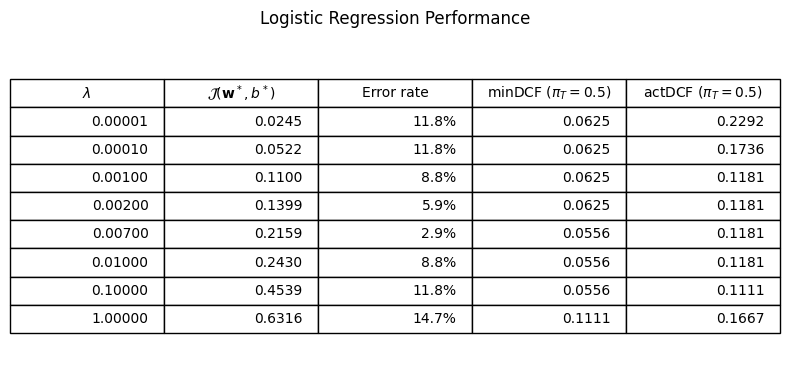

In [17]:
#TRY THE FINAL FUNCTION
lambdas_param = [10**(-5), 10**(-4), 10**(-3), 2* 10**(-3), 7* 10**(-3), 10**(-2), 10**(-1), 1.0]
LR.fitLogReg(DTR, LTR, DVAL, LVAL, lambdas_param)
